In [1]:
import pandas as pd
ticker_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stocks_df = ticker_df[0]
stocks_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [2]:
tickers = [tick for tick in stocks_df['Symbol']]
tickers = tickers + ['BAYRY', 'MON', 'SYT', 'BASFY']

In [3]:
import pandas_datareader as pdr
from datetime import datetime
stock_dict = {}
for tick in tickers:
    try:
        stock_dict[tick] = pdr.get_data_yahoo(symbols = tick, start = datetime(2010, 1, 1), end = datetime(2020, 4, 28))
    except:
        print('Exception occured for - ', tick)

/scale03/fs0/gpfs0/research/dsi-find/oo7433/Conda/envs/hackathon/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Exception occured for -  BRK.B
Exception occured for -  BF.B
Exception occured for -  SYT


In [4]:
stocks_df.loc[stocks_df['Security'].str.contains('Corteva'), :]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
130,CTVA,Corteva,reports,Materials,Fertilizers & Agricultural Chemicals,"Wilmington, Delaware",2019-06-03,1755672,2019


In [5]:
stocks_df.loc[stocks_df['Security'].str.contains('Dow'), :]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
155,DOW,Dow Inc.,reports,Materials,Commodity Chemicals,"Midland, Michigan",2019-04-01,1751788,2019


In [6]:
stocks_df.loc[stocks_df['Security'].str.contains('DuPont'), :]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
159,DD,DuPont de Nemours Inc,reports,Materials,Specialty Chemicals,"Midland, Michigan",2019-04-02,1666700,2017


In [7]:
stock_dict['CTVA']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-24,32.000000,28.500000,29.750000,29.000000,44000.0,28.586708
2019-05-28,30.500000,28.510000,29.250000,28.764999,61500.0,28.355057
2019-05-29,29.900000,27.660000,29.900000,28.500000,207800.0,28.093834
2019-05-30,29.160000,28.219999,28.990000,28.799999,666000.0,28.389559
2019-05-31,28.590000,26.969999,28.500000,26.969999,853800.0,26.585638
...,...,...,...,...,...,...
2020-04-22,25.215000,24.290001,24.750000,24.940001,3936700.0,24.940001
2020-04-23,25.840000,25.010000,25.280001,25.400000,2754500.0,25.400000
2020-04-24,26.680000,25.379999,25.580000,26.270000,3853900.0,26.270000


In [8]:
stock_dict['DD']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,41.545242,39.566898,40.136208,41.531010,11897200.0,33.340420
2010-01-05,43.452427,41.274822,41.274822,43.381264,13197600.0,34.825779
2010-01-06,45.060719,43.808243,44.092896,44.149826,15435700.0,35.442764
2010-01-07,44.548344,43.651684,44.135593,44.178291,7254800.0,35.465633
2010-01-08,44.605274,43.267399,43.779778,44.334854,5432600.0,35.591312
...,...,...,...,...,...,...
2020-04-22,40.400002,39.310001,40.020000,39.869999,3728500.0,39.869999
2020-04-23,41.980000,40.009998,40.160000,41.200001,5083600.0,41.200001
2020-04-24,42.240002,41.020000,41.700001,41.900002,5332200.0,41.900002


In [9]:
stock_dict['DOW']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,53.500000,49.500000,52.750000,49.799999,2350800.0,46.890896
2019-03-21,50.000000,48.200001,49.990002,48.980000,1764700.0,46.118793
2019-03-22,49.950001,48.160000,48.799999,48.599998,844700.0,45.760994
2019-03-25,49.400002,48.000000,48.599998,49.150002,440900.0,46.278870
2019-03-26,49.750000,48.180000,49.000000,48.849998,504700.0,45.996391
...,...,...,...,...,...,...
2020-04-22,32.025002,30.879999,31.799999,31.840000,5338100.0,31.840000
2020-04-23,33.330002,32.009998,32.099998,32.560001,7724700.0,32.560001
2020-04-24,33.349998,32.240002,33.040001,33.119999,4979100.0,33.119999


In [10]:
nasdaq_tickers = pdr.nasdaq_trader.get_nasdaq_symbols()

In [11]:
nasdaq_tickers.loc[nasdaq_tickers['Security Name'].str.contains('Dow')]

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
CHDN,True,"Churchill Downs, Incorporated - Common Stock",Q,Q,False,100.0,False,N,NaN,CHDN,False
DDM,True,ProShares Ultra Dow30,P,,True,100.0,False,NaN,DDM,DDM,False
DGT,True,SPDR Global Dow ETF (based on The Global Dow),P,,True,100.0,False,NaN,DGT,DGT,False
DIA,True,SPDR Dow Jones Industrial Average ETF,P,,True,100.0,False,NaN,DIA,DIA,False
DIAX,True,Nuveen Dow 30SM Dynamic Overwrite Fund Common ...,N,,False,100.0,False,NaN,DIAX,DIAX,False
DJD,True,Invesco Dow Jones Industrial Average Dividend ETF,P,,True,100.0,False,NaN,DJD,DJD,False
DOG,True,ProShares Short Dow30,P,,True,100.0,False,NaN,DOG,DOG,False
DOW,True,Dow Inc. Common Stock,N,,False,100.0,False,NaN,DOW,DOW,False
DXD,True,ProShares UltraShort Dow30,P,,True,100.0,False,NaN,DXD,DXD,False


In [12]:
pdr.data.DataReader('^DJI', 'stooq')

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-28,24357.17,24512.24,24031.20,24101.55,NaN
2020-04-27,23866.15,24207.65,23840.61,24133.78,90555598.0
2020-04-24,23628.24,23826.00,23417.68,23775.27,84749920.0
2020-04-23,23543.09,23885.36,23483.35,23515.26,95628819.0
2020-04-22,23437.34,23613.10,23339.60,23475.82,93946764.0
...,...,...,...,...,...
2015-05-06,17934.81,18019.75,17733.12,17841.98,100452376.0
2015-05-05,18062.53,18086.01,17905.71,17928.20,95359712.0
2015-05-04,18026.02,18133.76,18026.02,18070.40,86037616.0


In [13]:
import quandl
quandl.ApiConfig.api_key = '-mWQ4P2SCxWnQNsjJzhE'

In [14]:
for tick in tickers:
    try:
        historical = quandl.get('WIKI/' + tick, start_date = '2010-1-1', end_date = '2020-4-28')
        historical = historical[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj. Close']]
        historical.rename(columns = {'Adj. Close': 'Adj Close'}, inplace = True)
        stock_dict[tick] = pd.concat([stock_dict[tick], historical]).groupby(level = 0).first().sort_index()
    except:
        print('Exception occured for - ', tick)

Exception occured for -  AMCR
Exception occured for -  ANET
Exception occured for -  BKR
Exception occured for -  BRK.B
Exception occured for -  BF.B
Exception occured for -  CPRI
Exception occured for -  CARR
Exception occured for -  CDW
Exception occured for -  CTVA
Exception occured for -  EVRG
Exception occured for -  GL
Exception occured for -  PEAK
Exception occured for -  HWM
Exception occured for -  J
Exception occured for -  KEYS
Exception occured for -  LHX
Exception occured for -  LW
Exception occured for -  LIN
Exception occured for -  NLOK
Exception occured for -  OTIS
Exception occured for -  RTX
Exception occured for -  TT
Exception occured for -  TFC
Exception occured for -  VIAC
Exception occured for -  BAYRY
Exception occured for -  SYT


In [22]:
stock_dict['DOW'].to_csv("Dow_stocks.csv", sep = ',')

In [25]:
sp500_index = pd.read_table('sp500_historical_prices.csv', sep = ', ', engine = 'python', index_col = 'Date')
sp500_index.index = pd.to_datetime(sp500_index.index)
sp500_index.sort_index(inplace = True)
sp500_index

,Open,High,Low,Close
Date,,,,
2010-01-04,1116.56,1133.87,1116.56,1132.99
2010-01-05,1132.66,1136.63,1129.66,1136.52
2010-01-06,1135.71,1139.19,1133.95,1137.14
2010-01-07,1136.27,1142.46,1131.32,1141.69
2010-01-08,1140.52,1145.39,1136.22,1144.98
...,...,...,...,...
2020-04-22,2787.89,2815.10,2775.95,2799.31
2020-04-23,2810.42,2844.90,2794.26,2797.80
2020-04-24,2812.64,2842.71,2791.76,2836.74


In [287]:
companies = ['CTVA', 'DOW', 'DD', 'DD', 'BAYRY', 'MON', 'BASFY']

In [283]:
agriculture = stocks_df.loc[stocks_df['GICS Sub Industry'].str.contains('Agricultural', case = False)]
agriculture

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
51,ADM,Archer-Daniels-Midland Co,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
100,CF,CF Industries Holdings Inc,reports,Materials,Fertilizers & Agricultural Chemicals,"Deerfield, Illinois",2008-08-27,1324404,NaN
130,CTVA,Corteva,reports,Materials,Fertilizers & Agricultural Chemicals,"Wilmington, Delaware",2019-06-03,1755672,2019
141,DE,Deere & Co.,reports,Industrials,Agricultural & Farm Machinery,"Moline, Illinois",NaN,315189,1837
198,FMC,FMC Corporation,reports,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,NaN
329,MOS,The Mosaic Company,reports,Materials,Fertilizers & Agricultural Chemicals,"Tampa, Florida",2011-09-26,1285785,NaN


In [284]:
agriculture = list(set(companies) | set(agriculture['Symbol']))
agriculture

['MOS', 'DD', 'DOW', 'CF', 'BAYRY', 'ADM', 'FMC', 'BASFY', 'CTVA', 'MON', 'DE']

In [100]:
pharmaceuticals = stocks_df.loc[stocks_df['GICS Sub Industry'].str.contains('Pharmaceuticals', case = False)]
pharmaceuticals

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
20,AGN,"Allergan, plc",reports,Health Care,Pharmaceuticals,"Dublin, Ireland",1999-04-12,1578845,1983
268,JNJ,Johnson & Johnson,reports,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886
292,LLY,Lilly (Eli) & Co.,reports,Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876
315,MRK,Merck & Co.,reports,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",NaN,310158,1891
332,MYL,Mylan N.V.,reports,Health Care,Pharmaceuticals,"Amsterdam, Netherlands",2004-04-23,1623613,1961
373,PRGO,Perrigo,reports,Health Care,Pharmaceuticals,"Dublin, Ireland",2011-12-19,1585364,NaN
374,PFE,Pfizer Inc.,reports,Health Care,Pharmaceuticals,"New York, New York",NaN,78003,1849
504,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280,1952


In [101]:
pharmaceuticals = pharmaceuticals['Symbol'].tolist()
pharmaceuticals

['ABBV', 'AGN', 'JNJ', 'LLY', 'MRK', 'MYL', 'PRGO', 'PFE', 'ZTS']

In [290]:
sectors = pd.Series([[x] for x in companies], index = ['Corteva', 'Dow', 'DuPont', 'DowDuPont', 'Bayer', 'Monsanto', 'BASF'])
sectors = sectors.append(pd.Series({'Agriculture': agriculture, 'Pharmaceuticals': pharmaceuticals}))
sectors = sectors.append(stocks_df.groupby('GICS Sector', sort = False)['Symbol'].agg(lambda x: x.tolist()))
sectors

Corteva                                                              [CTVA]
Dow                                                                   [DOW]
DuPont                                                                 [DD]
DowDuPont                                                              [DD]
Bayer                                                               [BAYRY]
Monsanto                                                              [MON]
BASF                                                                [BASFY]
Agriculture               [MOS, DD, DOW, CF, BAYRY, ADM, FMC, BASFY, CTV...
Pharmaceuticals             [ABBV, AGN, JNJ, LLY, MRK, MYL, PRGO, PFE, ZTS]
Industrials               [MMM, ALK, ALLE, AAL, AME, AOS, BA, CHRW, CARR...
Health Care               [ABT, ABBV, ABMD, A, ALXN, ALGN, AGN, ABC, AMG...
Information Technology    [ACN, ADBE, AMD, AKAM, ADS, APH, ADI, ANSS, AA...
Communication Services    [ATVI, GOOGL, GOOG, T, CTL, CHTR, CMCSA, DISCA...
Consumer Dis

In [297]:
closes = sp500_index[['Close']].rename(columns = {'Close': 'SP500'})
tuples = [('Index', 'SP500')]
for sector, tickers in sectors.items():
    for tick in tickers:
        if tick in stock_dict:
            closes = closes.join(stock_dict[tick]['Adj Close'], how = 'outer').rename(columns = {'Adj Close': tick})
            tuples += [(sector, tick)]
index = pd.MultiIndex.from_tuples(tuples, names=['Category', 'Symbol'])
closes.columns = index
closes.loc['2017-09-01':'2019-03-19', ('DuPont', 'DD')] = np.nan
closes.loc['2010-01-01':'2017-08-31', ('DowDuPont', 'DD')] = np.nan
closes.loc['2019-03-20':'2020-04-28', ('DowDuPont', 'DD')] = np.nan
closes

Category      Index    Corteva        Dow     DuPont DowDuPont      Bayer  \
Symbol        SP500       CTVA        DOW         DD        DD      BAYRY   
Date                                                                        
2010-01-04  1132.99        NaN  22.789266  33.340420       NaN   7.619997   
2010-01-05  1136.52        NaN  23.804552  34.825779       NaN   7.479896   
2010-01-06  1137.14        NaN  24.226286  35.442764       NaN   7.423479   
2010-01-07  1141.69        NaN  24.241906  35.465633       NaN   7.301245   
2010-01-08  1144.98        NaN  24.327815  35.591312       NaN   7.305945   
...             ...        ...        ...        ...       ...        ...   
2020-04-22  2799.31  24.940001  31.840000  39.869999       NaN  15.362635   
2020-04-23  2797.80  25.400000  32.560001  41.200001       NaN  15.228880   
2020-04-24  2836.74  26.270000  33.119999  41.900002       NaN  15.505942   
2020-04-27  2878.48  25.559999  34.439999  43.820000       NaN  16.432669   
2020-04-28  2863.39  26.190001  35.869999  46.410000       NaN  16.461330   

Category     Monsanto       BASF Agriculture             ...     Energy  \
Symbol            MON      BASFY         MOS         DD  ...        NOV   
Date                                                     ...              
2010-01-04  72.418670  11.126820   52.358658  33.340420  ...  35.899864   
2010-01-05  74.015822  11.022832   53.580452  34.825779  ...  36.522991   
2010-01-06  75.113864  11.100824   55.633720  35.442764  ...  37.044846   
2010-01-07  74.843952  10.956972   55.794933  35.465633  ...  36.686554   
2010-01-08  75.444723  11.002034   56.592491  35.591312  ...  36.694359   
...               ...        ...         ...        ...  ...        ...   
2020-04-22        NaN  11.980000   11.040000  39.869999  ...  11.800000   
2020-04-23        NaN  11.950000   11.230000  41.200001  ...  12.420000   
2020-04-24        NaN  11.970000   11.330000  41.900002  ...  12.020000   
2020-04-27        NaN  12.370000   11.580000  43.820000  ...  12.350000   
2020-04-28        NaN  12.750000   11.530000  46.410000  ...  11.770000   

Category                                                                      \
Symbol            NBL        OXY        OKE        PSX        PXD        SLB   
Date                                                                           
2010-01-04  31.049971  53.605389  10.902699        NaN  49.768017  51.453903   
2010-01-05  31.855696  53.218349  10.807020        NaN  49.787540  51.599583   
2010-01-06  32.156769  53.856976  10.869210        NaN  50.656376  52.749626   
2010-01-07  31.724220  53.457027  10.797450        NaN  51.105442  53.293987   
2010-01-08  31.919306  54.005333  10.859646        NaN  51.984051  54.168045   
...               ...        ...        ...        ...        ...        ...   
2020-04-22   7.250000  13.020000  26.435518  58.180000  80.660004  15.340000   
2020-04-23   7.800000  13.870000  28.264999  59.970001  79.309998  16.520000   
2020-04-24   8.180000  13.810000  27.660000  60.529999  77.449997  16.110001   
2020-04-27   8.010000  14.150000  28.520000  63.490002  81.860001  16.049999   
2020-04-28   8.150000  15.170000  30.530001  67.339996  82.760002  16.150000   

Category                                     
Symbol            FTI        VLO        WMB  
Date                                         
2010-01-04  21.424124  12.258187  10.670890  
2010-01-05  21.793072  12.573381  10.804216  
2010-01-06  21.894348  12.888572  11.154807  
2010-01-07  21.641155  12.984498  11.075802  
2010-01-08  22.028183  12.806349  11.164683  
...               ...        ...        ...  
2020-04-22   8.260000  50.570000  17.660000  
2020-04-23   7.710000  52.070000  17.510000  
2020-04-24   8.020000  52.500000  18.280001  
2020-04-27   7.680000  55.570000  18.520000  
2020-04-28   7.960000  57.869999  18.910000  

[2598 rows x 531 columns]

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

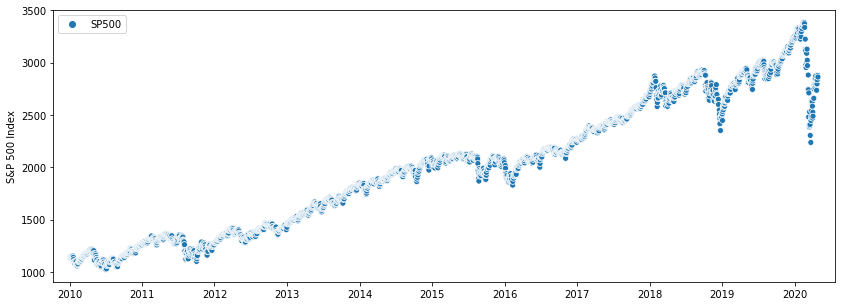

In [732]:
plt.figure(figsize = (14, 5))
ax = sns.scatterplot(data = closes['Index'])
from datetime import timedelta
ax.set_xlim(closes.index.min() - timedelta(weeks = 12), closes.index.max() + timedelta(weeks = 12))
ax.set(xlabel = '', ylabel = 'S&P 500 Index')
plt.show()

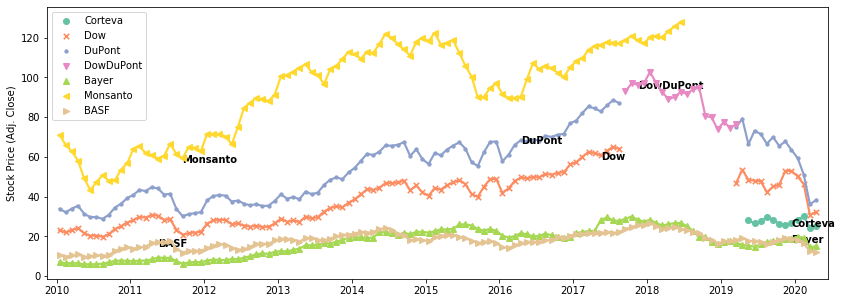

In [747]:
closes_df = closes.iloc[:, 1:8].resample('M').mean().groupby(axis = 1, level = 0, sort = False).mean()
closes_df_melt = pd.melt(closes_df.reset_index(), id_vars = 'Date', var_name = 'Category', value_name = 'Close')
plt.figure(figsize = (14, 5))
markers = ['o', 'x', '.', 'v', '^', '<', '>']
from itertools import cycle, islice
ax = sns.pointplot(x = 'Date', y = 'Close', hue = 'Category', data = closes_df_melt, label = 'xxxsmall', scale = 0.8,
                   markers = list(islice(cycle(markers), closes_df.shape[1])), palette = 'Set2')
ax.set(xlabel = '', ylabel = 'Stock Price (Adj. Close)')
ax.set_xlim(-2, 125)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.IndexLocator(12, 0))
ax.set_xticklabels(labels = closes_df.index[0::12].strftime('%Y'))
ax.legend(loc = 'upper left', bbox_to_anchor = (0, 1))
import numpy as np
for i in range(0, closes_df.shape[1]):
    x = np.random.choice(closes_df.reset_index().iloc[:, i + 1].dropna().index.values)
    ax.text(x, closes_df.iloc[x, i] + 2, closes_df.columns[i], va = 'top', size = 'medium', color = 'black', weight = 'heavy')
plt.show()

In [765]:
returns = closes.resample('M').mean().pct_change(fill_method = None)
returns_df = returns.groupby(axis = 1, level = 0, sort = False).mean()
returns_df.describe()

Category,Index,Corteva,Dow,DuPont,DowDuPont,Bayer,Monsanto,BASF,Agriculture,Pharmaceuticals,...,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,Energy
count,123.000000,11.000000,104.000000,104.000000,18.000000,123.000000,101.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.007848,-0.006595,0.008985,0.005227,-0.009595,0.008301,0.007194,0.003472,0.005770,0.010840,...,0.014029,0.014778,0.012150,0.010288,0.010079,0.009331,0.008803,0.009380,0.010523,0.002300
std,0.032806,0.082828,0.071546,0.070051,0.051051,0.066095,0.052731,0.066172,0.047558,0.032938,...,0.034255,0.043455,0.039093,0.045308,0.031217,0.046453,0.044499,0.038713,0.025668,0.067154
min,-0.190681,-0.198958,-0.336104,-0.292997,-0.148403,-0.251439,-0.154496,-0.247148,-0.259517,-0.132175,...,-0.151540,-0.196824,-0.210392,-0.294145,-0.171353,-0.277976,-0.231235,-0.214115,-0.123663,-0.430246
25%,-0.004346,-0.047318,-0.019002,-0.026741,-0.038897,-0.025277,-0.021950,-0.033538,-0.014973,-0.005800,...,-0.004051,-0.006679,-0.008411,-0.004351,-0.005971,-0.008234,-0.008589,-0.008105,-0.002679,-0.029825
50%,0.013787,0.036942,0.016566,0.016176,0.000737,0.009612,0.004724,0.007885,0.010018,0.017833,...,0.019320,0.024405,0.016408,0.010967,0.014816,0.010697,0.013005,0.014748,0.013449,0.013170
75%,0.027980,0.049588,0.055835,0.052128,0.024573,0.053264,0.029798,0.045280,0.038573,0.031922,...,0.034745,0.042501,0.032793,0.031427,0.028392,0.038324,0.033927,0.028049,0.025888,0.040978
max,0.061717,0.074317,0.185806,0.183052,0.057875,0.227668,0.135684,0.186575,0.119573,0.080918,...,0.087495,0.112960,0.089842,0.099595,0.070965,0.089657,0.127032,0.108794,0.062549,0.130884


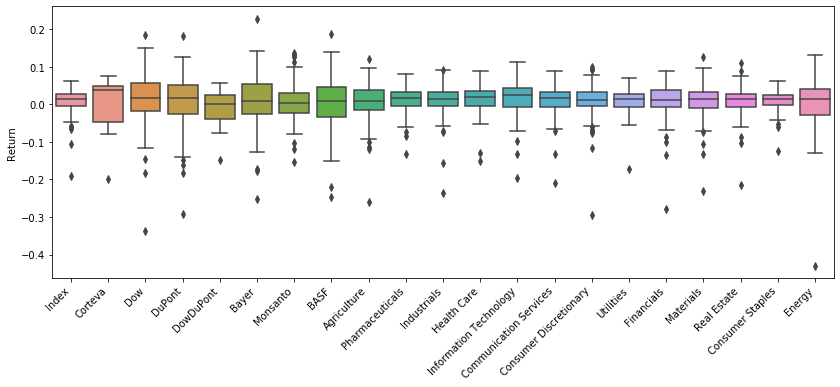

In [750]:
plt.figure(figsize = (14, 5))
ax = sns.boxplot(data = returns_df)
ax.set(xlabel = '', ylabel = 'Return')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

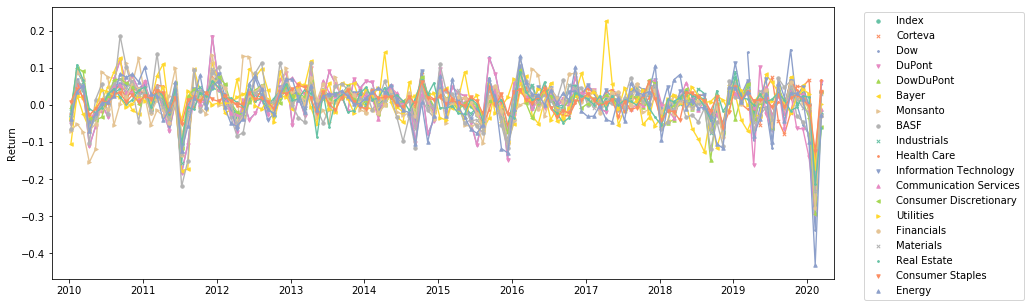

In [766]:
returns_df = returns_df.iloc[:, list(range(8)) + list(range(10, len(returns_df.columns)))]
returns_df_melt = pd.melt(returns_df.reset_index(), id_vars = 'Date', var_name = 'Category', value_name = 'Return')
plt.figure(figsize = (14, 5))
markers = ['o', 'x', '.', 'v', '^', '<', '>']
from itertools import cycle, islice
ax = sns.pointplot(x = 'Date', y = 'Return', hue = 'Category', data = returns_df_melt, label = 'xxxsmall', scale = 0.5,
                   markers = list(islice(cycle(markers), returns_df.shape[1])), palette = 'Set2')
ax.set(xlabel = '', ylabel = 'Return')
ax.set_xlim(-2, 125)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.IndexLocator(12, 0))
ax.set_xticklabels(labels = returns_df.index[0::12].strftime('%Y'))
ax.legend(loc = 'upper right', bbox_to_anchor = (1.25, 1))
plt.show()

In [721]:
returns = closes.resample('W').mean().pct_change(fill_method = None)
returns_kmeans_df = returns.iloc[:, [0, 5, 6, 7] + list(range(28, len(returns.columns)))]
tuples = list(returns_kmeans_df.columns)
tuples[1] = ('Materials', 'BAYRY')
tuples[2] = ('Materials', 'MON')
tuples[3] = ('Materials', 'BASFY')
index = pd.MultiIndex.from_tuples(tuples, names=['Category', 'Symbol'])
returns_kmeans_df.columns = index
returns_kmeans_df = returns_kmeans_df.loc[:, returns_kmeans_df.isnull().sum() < 50]
from sklearn.impute import SimpleImputer
data = SimpleImputer(missing_values = np.nan, strategy = 'mean').fit_transform(returns_kmeans_df).T
from sklearn.decomposition import PCA
reduced_data = PCA(n_components = 2).fit_transform(data)
reduced_data = pd.DataFrame(reduced_data)
reduced_data.index = returns_kmeans_df.columns
reduced_data.columns = ['X', 'Y']

In [727]:
from sklearn.cluster import KMeans
n_clusters = 8
kmeans = KMeans(n_clusters = n_clusters, max_iter = 1000, n_init = 1, random_state = 420)
pred = kmeans.fit_predict(data)

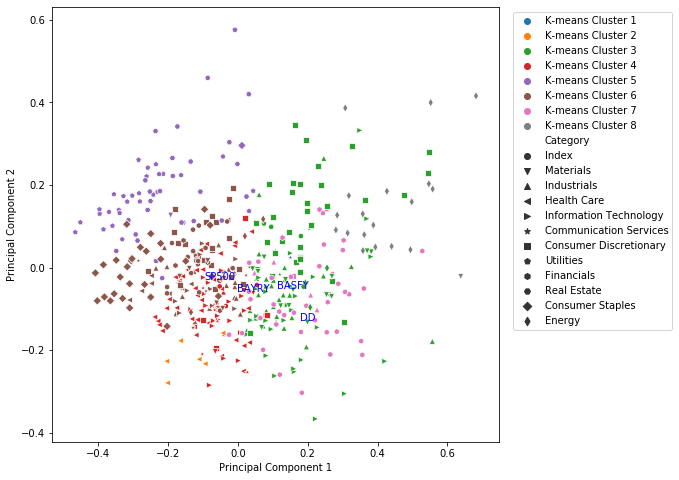

In [760]:
plt.figure(figsize = (8, 8))
ax = sns.scatterplot(data = reduced_data.reset_index(), x = 'X', y = 'Y', style = 'Category',
                     hue = ['K-means Cluster ' + str(x + 1) for x in pred],
                     hue_order = ['K-means Cluster ' + str(x + 1) for x in range(n_clusters)],
                     markers = ['o', 'v', '^', '<', '>', '*', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X'])
ax.set(xlabel = 'Principal Component 1', ylabel = 'Principal Component 2')
ax.legend(loc = 'upper right', bbox_to_anchor = (1.4, 1))
x = reduced_data.reset_index()
x = x.loc[(x['Symbol'].isin(companies)) | (x['Symbol'] == 'SP500')]
for index, point in x.iterrows():
    ax.text(point['X'], point['Y'] + 0.01, point['Symbol'], va = 'center', ha = 'center', color = 'blue')
plt.show()